# ANOVA and Chi Square 

**Reference Material :**
1. http://onlinestatbook.com/2/analysis_of_variance/anova.pdf
2. http://onlinestatbook.com/2/chi_square/Chi_Square.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### Example

#### National Transportation Safety Board  (NTSB) examines the safety of compact cars, midsize cars and full-size cars. 

Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of  car at 5% level of significance.

* mean_pressure_ compact_car    =  [643, 655,702]
* mean_pressure_ midsize_car    =  [469, 427, 525]
* mean_pressure_ fullsize_car   =  [484, 456, 402]

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
mean_pressure_compact_car=np.array([643, 655,702])
mean_pressure_midsize_car=np.array([469, 427, 525])
mean_pressure_fullsize_car=np.array([484, 456, 402])
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

In [5]:
import warnings
warnings.filterwarnings('ignore')
df1=pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2= pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3= pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})
mean_pressure_df=pd.DataFrame()
mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2)
mean_pressure_df = mean_pressure_df.append(df3)
mean_pressure_df

,Car_Type,Mean_Pressure
0,C,643
1,C,655
2,C,702
0,M,469
1,M,427
2,M,525
0,F,484
1,F,456
2,F,402


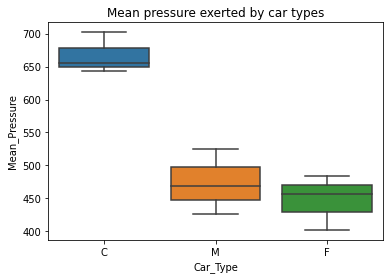

In [6]:
sns.boxplot(x = "Car_Type", y = "Mean_Pressure", data = mean_pressure_df)
plt.title('Mean pressure exerted by car types')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA

In [7]:
from scipy.stats import f_oneway
fscore, pvalue = f_oneway(mean_pressure_compact_car,mean_pressure_midsize_car,mean_pressure_fullsize_car)
print(pvalue)
print(fscore)
if pvalue <= 0.05:
    print("Alternate Hypothesis passed (H1) - pressure means are different")
else:
    print("Null Hypothesis passed (H0) - pressure means are same")

0.0012071270284831192
25.175411221637088
Alternate Hypothesis passed (H1) - pressure means are different


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean pressure of car is different from others .

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* You have rejected the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD (Honestly Significant Difference) test to detect which mean(s) is / are different.

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['Car_Type']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C      F -219.3333 0.0015 -322.8999 -115.7668   True
     C      M    -193.0  0.003 -296.5666  -89.4334   True
     F      M   26.3333 0.7279  -77.2332  129.8999  False
---------------------------------------------------------


#### Inference 

* Compact Car Vs Full-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Full-size cars.

* Compact Car Vs Mid-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Mid-size cars.

* Full-size Car Vs Mid-size cars: Since the result - reject is false, mean head pressure is statistically equal to Full-size and Mid-size cars.

## Chi Square

### Example

The table below contains the number of perfect, satisfactory and defective products that are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [9]:
# import pandas as pd
import numpy as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.